# 1. Importing Modules and Packages, Reading Data, Defining Functions

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_csv('raw_data.csv')
df.head()

,link,brand,line,monthly_payment,price,manufacturing_date,mileage,Transmission,Number of Gears,Doors,...,Rear Brakes,Front Suspension,Rear Suspension,Steering Type,Front Tyre,Rear Tyre,Front Rim (inches),Rear Rim (inches),Final Drive Ratio,Steering Radius
0,https://www.carlist.my/used-cars/2020-bmw-330i...,BMW,3 Series,"RM 2,969 / month","RM 228,999",2020.0,40 - 45K km,Automatic,8.0,4.0,...,Ventilated discs,Macpherson Strut,Multiple links,Rack and Pinion,225/45 R18,255/40 R18,18x7.5,18x8.5,NaN,NaN
1,https://www.carlist.my/used-cars/2015-mercedes...,Mercedes-Benz,C-Class,"RM 1,659 / month","RM 127,999",2015.0,100 - 105K km,Automatic,7.0,4.0,...,Discs,Multilink,Multiple links,Rack and Pinion,NaN,NaN,NaN,NaN,3.070,11.2
2,https://www.carlist.my/used-cars/2016-mercedes...,Mercedes-Benz,E-Class,"RM 1,556 / month","RM 119,999",2016.0,125 - 130K km,Automatic,9.0,4.0,...,Ventilated discs,Multilink,Multiple links,Rack and Pinion,NaN,NaN,19,19,NaN,NaN
3,https://www.carlist.my/used-cars/2018-daihatsu...,Daihatsu,Gran Max,RM 568 / month,"RM 43,800",2018.0,125 - 130K km,Manual,5.0,5.0,...,Drums,Macpherson Strut,Rigid axle,Rack and Pinion,165R13C,165R13C,13,13,4.875,9.4
4,https://www.carlist.my/used-cars/2015-toyota-a...,Toyota,Alphard,"RM 2,437 / month","RM 188,000",2015.0,55 - 60K km,Automatic,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Exploratory Data Analysis

Define useful functions.

In [ ]:
def analyze_unique_values(data_frame):
    """
    Analyzes and prints unique values in each column of the given DataFrame.

    Parameters:
        data_frame (pandas.DataFrame): The DataFrame to analyze.
    """
    for col in data_frame.columns:
        unique_count = data_frame[col].nunique()
        data_type = data_frame[col].dtypes

        print("Column: {}".format(col))
        print("Unique Values Count: {}".format(unique_count))
        print("Data Type: {}".format(data_type))

        if data_type in ['int64', 'float', 'object']:
            unique_values = data_frame[col].unique()[:5]  # Display the first 5 unique values
            print("Unique Values:")
            for value in unique_values:
                print("- {}".format(value))

            if unique_count > 5:
                print("... and {} more unique values".format(unique_count - 5))

        print("-" * 90)

def print_columns_by_dtype(data_frame):
    """
    Prints columns for each data type in the given DataFrame.

    Parameters:
        data_frame (pandas.DataFrame): The DataFrame to analyze.
    """
    unique_dtypes = data_frame.dtypes.unique()

    for dtype in unique_dtypes:
        matching_columns = [col for col in data_frame.columns if data_frame[col].dtypes == dtype]

        print("Columns with data type {}: {}".format(dtype, ', '.join(matching_columns)))
        print("-" * 90)

def analyze_missing_values(data_frame):
    """
    Analyzes and prints missing values count and percentages for each column in the given DataFrame.
    The table is sorted from highest missing values count to lowest.

    Parameters:
        data_frame (pandas.DataFrame): The DataFrame to analyze.
    """
    missing_values_count = data_frame.isnull().sum()
    total_missing_values = missing_values_count.sum()

    # Calculate the percentage of missing values for each column
    total_rows = data_frame.shape[0]
    missing_percentage = (missing_values_count / total_rows) * 100

    # Create a list of tuples (column_name, missing_count, missing_percentage)
    missing_info = [(column, count, percentage) for column, count, percentage in zip(missing_values_count.index, missing_values_count.values, missing_percentage.values)]

    # Sort the list by missing_count in descending order
    missing_info.sort(key=lambda x: x[1], reverse=True)

    # Print the sorted table
    print(f"{'COLUMN':<30}{'MISSING VALUES PERCENTAGE':<30}{'MISSING VALUE COUNT':<30}")
    print("-" * 90)
    for column, count, percentage in missing_info:
        print(f"{column:<30}{percentage:.2f}% ({count:<6} missing)")

def analyze_column_types(data_frame):
    """
    Analyzes and prints categorical and continuous columns along with their names and counts.

    Parameters:
        data_frame (pandas.DataFrame): The DataFrame to analyze.
    """
    categorical_columns = []
    continuous_columns = []

    for col in data_frame.columns:
        unique_count = data_frame[col].nunique()

        if np.issubdtype(data_frame[col].dtype, np.number) and unique_count > 5:
            continuous_columns.append(col)
        else:
            categorical_columns.append(col)

    print("Discrete columns: {}".format(', '.join(categorical_columns)))
    print("Count: {}\n".format(len(categorical_columns)))

    print("Continuous columns: {}".format(', '.join(continuous_columns)))
    print("Count: {}\n".format(len(continuous_columns)))

In [ ]:
analyze_missing_values(df)

COLUMN                        MISSING VALUES PERCENTAGE     MISSING VALUE COUNT           
------------------------------------------------------------------------------------------
Final Drive Ratio             81.81% (6542   missing)
CO2 Emission                  76.49% (6117   missing)
Boot Space (litres)           74.14% (5929   missing)
0-100mk/h (seconds)           58.48% (4677   missing)
Top Speed (km/h)              56.25% (4498   missing)
Fuel Consumption (L/100km)    54.88% (4389   missing)
Engine Model                  43.00% (3439   missing)
Steering Radius               38.68% (3093   missing)
Bore (mm)                     36.99% (2958   missing)
Stroke (mm)                   36.75% (2939   missing)
Compression Ratio             36.55% (2923   missing)
Rear Thread                   30.07% (2405   missing)
Front Thread                  29.60% (2367   missing)
Number of Gears               19.86% (1588   missing)
Rear Suspension               17.78% (1422   missing)
Front Ty

In [ ]:
analyze_column_types(df)

Discrete columns: link, brand, line, monthly_payment, price, mileage, Transmission, Doors, Assembled, Engine Model, Engine Type, Direct Injection, Aspiration, Fuel Type, Front Brakes, Rear Brakes, Front Suspension, Rear Suspension, Steering Type, Front Tyre, Rear Tyre, Front Rim (inches), Rear Rim (inches)
Count: 23

Continuous columns: manufacturing_date, Number of Gears, Seat Capacity, Engine CC, Bore (mm), Stroke (mm), Compression Ratio, Peak Power (hp), Peak Torque (Nm), Fuel Consumption (L/100km), CO2 Emission, 0-100mk/h (seconds), Top Speed (km/h), Length (mm), Width (mm), Height (mm), Wheel Base (mm), Front Thread, Rear Thread, Kerb Weight (kg), Boot Space (litres), Fuel Tank (litres), Final Drive Ratio, Steering Radius
Count: 24



In [ ]:
print_columns_by_dtype(df)

Columns with data type object: link, brand, line, monthly_payment, price, mileage, Transmission, Assembled, Engine Model, Engine Type, Direct Injection, Aspiration, Fuel Type, Front Brakes, Rear Brakes, Front Suspension, Rear Suspension, Steering Type, Front Tyre, Rear Tyre, Front Rim (inches), Rear Rim (inches)
------------------------------------------------------------------------------------------
Columns with data type float64: manufacturing_date, Number of Gears, Doors, Seat Capacity, Engine CC, Bore (mm), Stroke (mm), Compression Ratio, Peak Power (hp), Peak Torque (Nm), Fuel Consumption (L/100km), CO2 Emission, 0-100mk/h (seconds), Top Speed (km/h), Length (mm), Width (mm), Height (mm), Wheel Base (mm), Front Thread, Rear Thread, Kerb Weight (kg), Boot Space (litres), Fuel Tank (litres), Final Drive Ratio, Steering Radius
------------------------------------------------------------------------------------------


In [ ]:
analyze_unique_values(df)

Column: link
Unique Values Count: 7997
Data Type: object
Unique Values:
- https://www.carlist.my/used-cars/2020-bmw-330i-m-sport-genuine-year-made-f-service-record-low-mileage-under-warranty-bmw/11896981
- https://www.carlist.my/used-cars/2015-mercedes-benz-c200-2-0-amg-tiptop-low-mileage-promo-raya-diskaun/12302173
- https://www.carlist.my/used-cars/2016-mercedes-benz-e250-avantgarde-one-owner-tiptop-condition/12029371
- https://www.carlist.my/used-cars/2018-daihatsu-gran-max-1-5-panel-van-m/12011757
- https://www.carlist.my/used-cars/2015-toyota-alphard-2-5-tip-top-condition-fully-convert/12213310
... and 7992 more unique values
------------------------------------------------------------------------------------------
Column: brand
Unique Values Count: 48
Data Type: object
Unique Values:
- BMW
- Mercedes-Benz
- Daihatsu
- Toyota
- Nissan
... and 43 more unique values
------------------------------------------------------------------------------------------
Column: line
Unique Values 

Data Quality Assessment:
- Missing values
- Values formatting

In [ ]:
df_backup = df.copy()

In [ ]:
df = df_backup.copy()

## Missing Values

Approach:
- Drop all columns with more than 30% missing values
- Use proper data imputation for other remaining columns

In [ ]:
missing_values_count = df.isnull().sum()
total_missing_values = missing_values_count.sum()

# Calculate the percentage of missing values for each column
total_rows = df.shape[0]
missing_percentage = (missing_values_count / total_rows) * 100

# Filter columns with missing values exceeding the threshold
high_missing_columns = missing_percentage[missing_percentage > 30]

if not high_missing_columns.empty:
  print(f"Columns with more than {30}% missing values:")
  print(high_missing_columns)

Columns with more than 30% missing values:
Bore (mm)                     36.988871
Stroke (mm)                   36.751282
Compression Ratio             36.551207
Engine Model                  43.003626
Fuel Consumption (L/100km)    54.883081
CO2 Emission                  76.491184
0-100mk/h (seconds)           58.484432
Top Speed (km/h)              56.246092
Rear Thread                   30.073778
Boot Space (litres)           74.140303
Final Drive Ratio             81.805677
Steering Radius               38.677004
dtype: float64


In [ ]:
column_drop = ['Bore (mm)',
               'Stroke (mm)',
               'Compression Ratio',
               'Engine Model',
               'Fuel Consumption (L/100km)',
               'CO2 Emission',
               '0-100mk/h (seconds)',
               'Top Speed (km/h)',
               'Rear Thread',
               'Boot Space (litres)',
               'Final Drive Ratio',
               'Steering Radius']

df.drop(columns=column_drop, inplace=True)

In [ ]:
analyze_missing_values(df)

COLUMN                        MISSING VALUES PERCENTAGE     MISSING VALUE COUNT           
------------------------------------------------------------------------------------------
Front Thread                  29.60% (2367   missing)
Number of Gears               19.86% (1588   missing)
Rear Suspension               17.78% (1422   missing)
Front Tyre                    17.72% (1417   missing)
Rear Tyre                     17.68% (1414   missing)
Front Suspension              17.38% (1390   missing)
Kerb Weight (kg)              14.89% (1191   missing)
Fuel Tank (litres)            13.04% (1043   missing)
Rear Brakes                   11.73% (938    missing)
Front Rim (inches)            11.37% (909    missing)
Rear Rim (inches)             11.37% (909    missing)
Front Brakes                  9.57% (765    missing)
Direct Injection              4.58% (366    missing)
Aspiration                    4.54% (363    missing)
Peak Torque (Nm)              4.43% (354    missing)
Length (mm) 

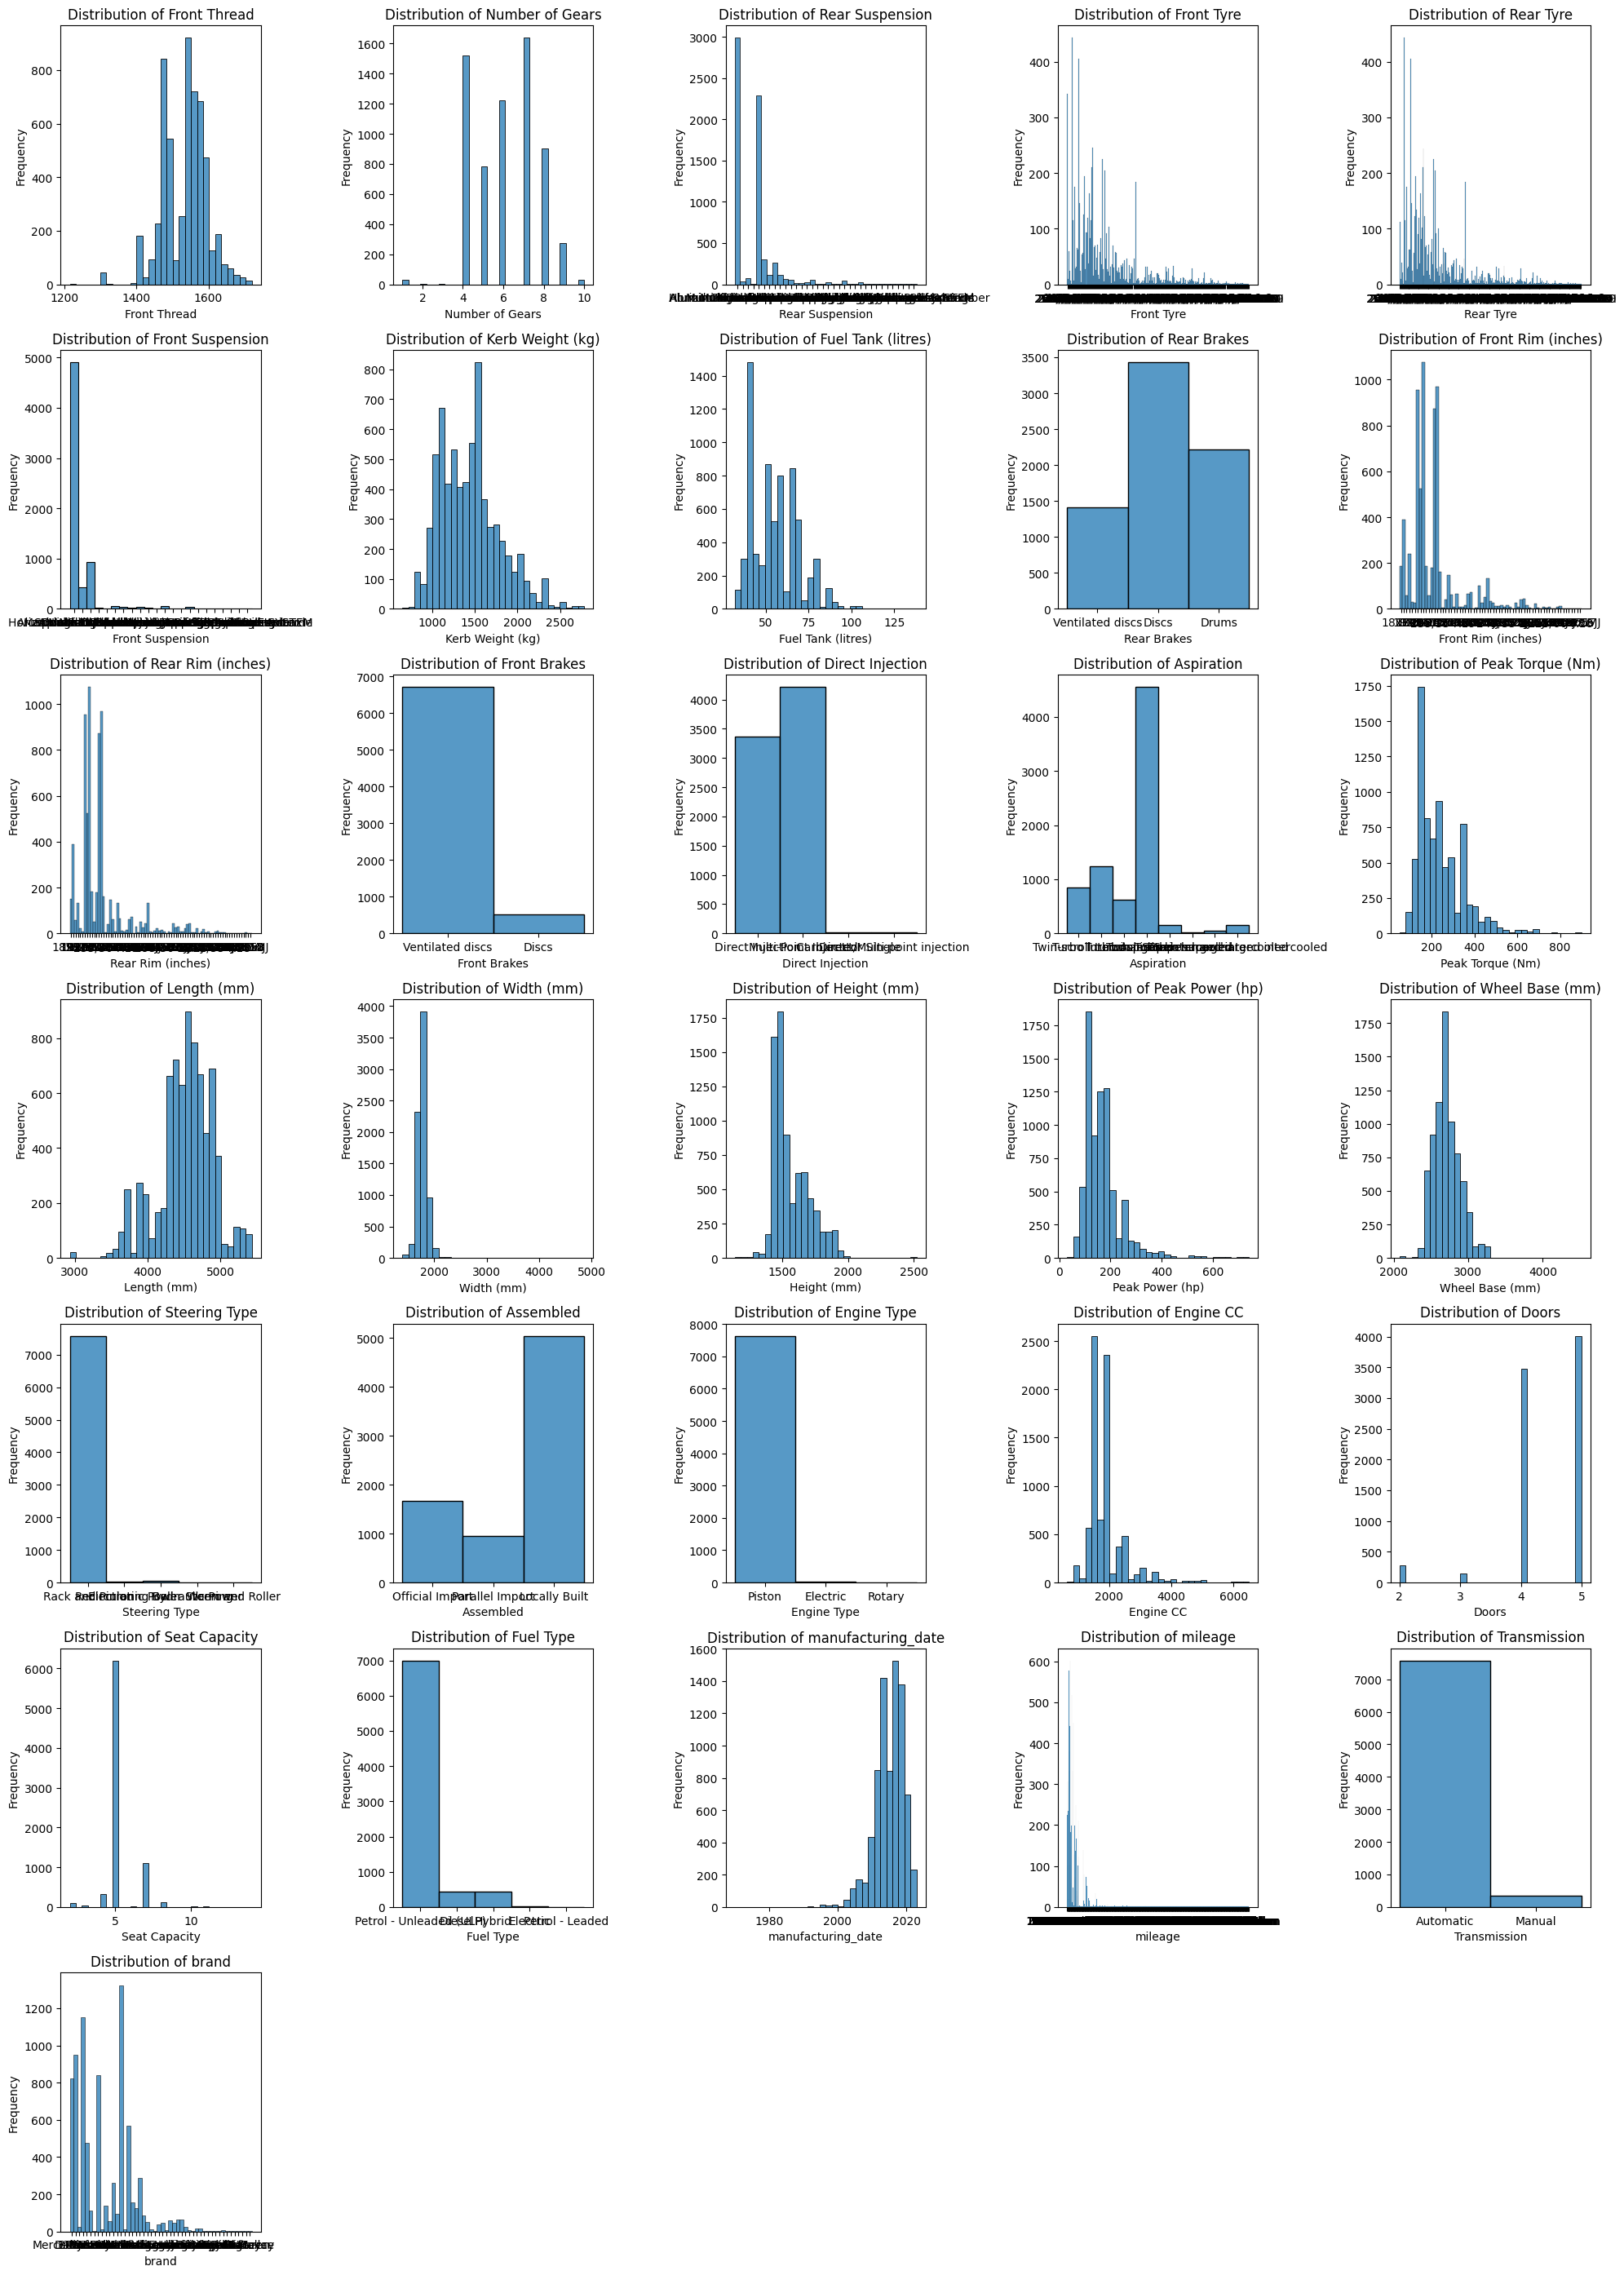

In [ ]:
columns_to_plot = ['Front Thread',
                    'Number of Gears',
                    'Rear Suspension',
                    'Front Tyre',
                    'Rear Tyre',
                    'Front Suspension',
                    'Kerb Weight (kg)',
                    'Fuel Tank (litres)',
                    'Rear Brakes',
                    'Front Rim (inches)',
                    'Rear Rim (inches)',
                    'Front Brakes',
                    'Direct Injection',
                    'Aspiration',
                    'Peak Torque (Nm)',
                    'Length (mm)',
                    'Width (mm)',
                    'Height (mm)',
                    'Peak Power (hp)',
                    'Wheel Base (mm)',
                    'Steering Type',
                    'Assembled',
                    'Engine Type',
                    'Engine CC',
                    'Doors',
                    'Seat Capacity',
                    'Fuel Type',
                    'manufacturing_date',
                    'mileage',
                    'Transmission',
                    'brand']

# Calculate the number of rows and columns needed to fit all subplots
num_columns = len(columns_to_plot)
num_rows = (num_columns + 4) // 5  # Calculate the number of rows (5 subplots per row)

# Set the overall figure size for all subplots
plt.figure(figsize=(20, 4 * num_rows))  # Adjust the height based on the number of rows

# Loop through the specified columns and create separate subplots
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(num_rows, 5, i)  # Create subplots in a grid with 5 columns
    sns.histplot(data=df, x=column, bins=30, kde=False)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show all the subplots
plt.show()

**Fill Based on Previous Row Value**

In [ ]:
columns_fill = ['Front Thread',
                    'Number of Gears',
                    'Rear Suspension',
                    'Front Tyre',
                    'Rear Tyre',
                    'Kerb Weight (kg)',
                    'Fuel Tank (litres)',
                    'Front Rim (inches)',
                    'Rear Rim (inches)',
                    'mileage',
                    'Rear Brakes']

# Fill missing values with values from the previous row
for i, column in enumerate(columns_fill):
  df[column].fillna(method='ffill', inplace=True)

**Fill Based on Median**

In [ ]:
columns_fill = ['Peak Torque (Nm)',
                'Peak Power (hp)',
                'Engine CC',
                'manufacturing_date']

for column in columns_fill:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

**Fill Based on Mean**

In [ ]:
columns_fill = ['Length (mm)',
                'Width (mm)',
                'Height (mm)',
                'Wheel Base (mm)']

for column in columns_fill:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)

**Fill Based on Highest Frequent**

In [ ]:
columns_fill = ['Front Suspension',
                'Front Brakes',
                'Direct Injection',
                'Aspiration',
                'Steering Type',
                'Assembled',
                'Engine Type',
                'Doors',
                'Seat Capacity',
                'Fuel Type',
                'Transmission']

for column in columns_fill:
    mode_values = df[column].mode()
    if not mode_values.empty:
        mode_value = mode_values.iloc[0]
        df[column].fillna(mode_value, inplace=True)

**Drop Data with Missing 'price'**

In [ ]:
df.dropna(subset=['price'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7731 entries, 0 to 7996
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   link                7731 non-null   object 
 1   brand               7731 non-null   object 
 2   line                7731 non-null   object 
 3   monthly_payment     7731 non-null   object 
 4   price               7731 non-null   object 
 5   manufacturing_date  7731 non-null   float64
 6   mileage             7731 non-null   object 
 7   Transmission        7731 non-null   object 
 8   Number of Gears     7731 non-null   float64
 9   Doors               7731 non-null   float64
 10  Seat Capacity       7731 non-null   float64
 11  Assembled           7731 non-null   object 
 12  Engine CC           7731 non-null   float64
 13  Peak Power (hp)     7731 non-null   float64
 14  Peak Torque (Nm)    7731 non-null   float64
 15  Engine Type         7731 non-null   object 
 16  Direct

## Data Transformation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7731 entries, 0 to 7996
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   link                7731 non-null   object 
 1   brand               7731 non-null   object 
 2   line                7731 non-null   object 
 3   monthly_payment     7731 non-null   object 
 4   price               7731 non-null   object 
 5   manufacturing_date  7731 non-null   float64
 6   mileage             7731 non-null   object 
 7   Transmission        7731 non-null   object 
 8   Number of Gears     7731 non-null   float64
 9   Doors               7731 non-null   float64
 10  Seat Capacity       7731 non-null   float64
 11  Assembled           7731 non-null   object 
 12  Engine CC           7731 non-null   float64
 13  Peak Power (hp)     7731 non-null   float64
 14  Peak Torque (Nm)    7731 non-null   float64
 15  Engine Type         7731 non-null   object 
 16  Direct

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
link,7731,7731,https://www.carlist.my/used-cars/2020-bmw-330i...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,7731,47,Honda,1256,NaN,NaN,NaN,NaN,NaN,NaN,NaN
line,7731,328,Myvi,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monthly_payment,7731,1255,RM 775 / month,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,7731,1697,"RM 59,800",83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
manufacturing_date,7731.0,NaN,NaN,NaN,2014.965981,4.196161,1970.0,2013.0,2015.0,2018.0,2023.0
mileage,7731,556,80 - 85K km,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7731,2,Automatic,7383,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number of Gears,7731.0,NaN,NaN,NaN,6.050058,1.568597,1.0,5.0,6.0,7.0,10.0
Doors,7731.0,NaN,NaN,NaN,4.4156,0.705154,2.0,4.0,5.0,5.0,5.0


**Transform 'price' column**

In [ ]:
df['price'] = df['price'].str.replace('RM', '').str.replace(',', '', regex=True).astype(int)

**Transform 'mileage' column**

In [ ]:
df_backup = df.copy()

In [ ]:
df = df_backup.copy()

In [ ]:
import re

# Function to extract and convert mileage values
def extract_mileage(mileage_str):
    # Define a regular expression pattern to match different formats
    pattern = r'(\d+) - (\d+)|(\d+)'

    # Search for matches in the input string
    match = re.search(pattern, mileage_str)

    if match:
        # If there's a match, extract and return the numeric part(s)
        groups = match.groups()
        if groups[0] is not None and groups[1] is not None:
            # Calculate the average of the range values
            return (int(groups[0]) + int(groups[1])) / 2
        elif groups[2] is not None:
            # If only one number is present, return it as is
            return int(groups[2])

    # If no match is found, return NaN
    return np.nan

# Apply the function to the 'mileage' column
df['mileage'] = df['mileage'].apply(extract_mileage)

In [ ]:
df_backup['mileage'].value_counts()

80 - 85K km    596
90 - 95K km    568
85 - 90K km    509
70 - 75K km    445
75 - 80K km    436
              ... 
60684 km         1
53075 km         1
128740 km        1
54133 km         1
92026 km         1
Name: mileage, Length: 556, dtype: int64

In [ ]:
df['mileage'].value_counts()

82.5        596
92.5        568
87.5        509
72.5        445
77.5        436
           ... 
60684.0       1
53075.0       1
128740.0      1
54133.0       1
92026.0       1
Name: mileage, Length: 556, dtype: int64

## Data Types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7731 entries, 0 to 7996
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   link                7731 non-null   object 
 1   brand               7731 non-null   object 
 2   line                7731 non-null   object 
 3   monthly_payment     7731 non-null   object 
 4   price               7731 non-null   int64  
 5   manufacturing_date  7731 non-null   float64
 6   mileage             7731 non-null   float64
 7   Transmission        7731 non-null   object 
 8   Number of Gears     7731 non-null   float64
 9   Doors               7731 non-null   float64
 10  Seat Capacity       7731 non-null   float64
 11  Assembled           7731 non-null   object 
 12  Engine CC           7731 non-null   float64
 13  Peak Power (hp)     7731 non-null   float64
 14  Peak Torque (Nm)    7731 non-null   float64
 15  Engine Type         7731 non-null   object 
 16  Direct

**'object' to 'float64'**

In [ ]:
df['price'] = df['price'].astype('float64')

**'float64' to 'int'**

In [ ]:
columns_change = ['Peak Torque (Nm)',
                  'Peak Power (hp)',
                  'Engine CC',
                  'Doors',
                  'Seat Capacity',
                  'Number of Gears',
                  'manufacturing_date']

for column in columns_change:
    df[column] = df[column].astype('int64')

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
link,7731,7731,https://www.carlist.my/used-cars/2020-bmw-330i...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,7731,47,Honda,1256,NaN,NaN,NaN,NaN,NaN,NaN,NaN
line,7731,328,Myvi,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monthly_payment,7731,1255,RM 775 / month,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,7731.0,NaN,NaN,NaN,92705.817229,107610.934063,2688.0,37800.0,62000.0,113888.0,1630000.0
manufacturing_date,7731.0,NaN,NaN,NaN,2014.965981,4.196161,1970.0,2013.0,2015.0,2018.0,2023.0
mileage,7731.0,NaN,NaN,NaN,6176.114798,24887.931062,1.0,62.5,82.5,107.5,490127.0
Transmission,7731,2,Automatic,7383,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number of Gears,7731.0,NaN,NaN,NaN,6.050058,1.568597,1.0,5.0,6.0,7.0,10.0
Doors,7731.0,NaN,NaN,NaN,4.4156,0.705154,2.0,4.0,5.0,5.0,5.0


## Data Duplicates

In [ ]:
# Calculate the number of duplicate rows
num_duplicates = df.duplicated().sum()

print(f'Number of duplicate rows: {num_duplicates}')

Number of duplicate rows: 0


In [ ]:
df.drop_duplicates(inplace=True)
num_duplicates = df.duplicated().sum()

print(f'Number of duplicate rows: {num_duplicates}')

Number of duplicate rows: 0


## Data Inconsistencies

In [ ]:
df['brand'].value_counts()

Honda            1256
Toyota           1124
Mercedes-Benz     927
Perodua           804
BMW               780
Proton            556
Nissan            465
Volkswagen        280
Mazda             254
Ford              156
Mitsubishi        136
Audi              123
Porsche           111
MINI               92
Kia                82
Land Rover         64
Hyundai            62
Volvo              59
Subaru             53
Peugeot            52
Inokom             46
Lexus              44
Suzuki             37
Daihatsu           25
Isuzu              23
Naza               17
Bentley            16
Lamborghini        12
Chevrolet          12
Hino               11
Ferrari             8
Jaguar              8
BYD                 8
Maserati            4
Jeep                4
Maxus               4
Chery               3
Ssangyong           3
Infiniti            2
CAM                 1
McLaren             1
Fiat                1
Citroen             1
Great Wall          1
Renault             1
Cadillac  

In [ ]:
df['line'].value_counts()

Myvi        398
C-Class     328
City        294
Civic       290
3 Series    267
           ... 
Ria           1
Mondeo        1
XFS           1
Gen2          1
A1            1
Name: line, Length: 328, dtype: int64

## Feature Engineering

**Age**

In [ ]:
# Calculate vehicle age and add a new column
df['vehicle_age'] = 2023 - df['manufacturing_date']

# Drop the 'manufacturing_date' column
df.drop('manufacturing_date', axis=1, inplace=True)

**Vehicle volume**

In [ ]:
df['volume'] = df['Length (mm)'] * df['Width (mm)'] * df['Height (mm)']

columns_drop = ['Length (mm)', 'Width (mm)', 'Height (mm)']
df.drop(columns = columns_drop, axis=1, inplace=True)

**Power-to-Weight Ratio (specific power)**

Measurement of performance of a vehicle as a whole, with the engine's power output being divided by the weight (or mass) of the vehicle, to give a metric that is independent of the vehicle's size

In [ ]:
df['specific_power'] = (df['Peak Power (hp)']/0.00134)/df['Kerb Weight (kg)']

columns_drop = ['Peak Power (hp)', 'Kerb Weight (kg)']
df.drop(columns = columns_drop, axis=1, inplace=True)

**Brands Grouping**

In [ ]:
df['brand'].value_counts()

Honda            1256
Toyota           1124
Mercedes-Benz     927
Perodua           804
BMW               780
Proton            556
Nissan            465
Volkswagen        280
Mazda             254
Ford              156
Mitsubishi        136
Audi              123
Porsche           111
MINI               92
Kia                82
Land Rover         64
Hyundai            62
Volvo              59
Subaru             53
Peugeot            52
Inokom             46
Lexus              44
Suzuki             37
Daihatsu           25
Isuzu              23
Naza               17
Bentley            16
Lamborghini        12
Chevrolet          12
Hino               11
Ferrari             8
Jaguar              8
BYD                 8
Maserati            4
Jeep                4
Maxus               4
Chery               3
Ssangyong           3
Infiniti            2
CAM                 1
McLaren             1
Fiat                1
Citroen             1
Great Wall          1
Renault             1
Cadillac  

In [ ]:
# Group the data by 'brand' and calculate the mean price for each brand
brand_mean_price = df.groupby('brand')['price'].mean()

# Calculate quartile boundaries
quartiles = pd.qcut(brand_mean_price, q=[0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=['D', 'C', 'B', 'A', 'S'])

# Add the quartile information to the 'brand_mean_price' Series
brand_mean_price_with_quartile = brand_mean_price.to_frame()
brand_mean_price_with_quartile['Quartile'] = quartiles

# Sort the DataFrame by mean price
brand_mean_price_with_quartile = brand_mean_price_with_quartile.sort_values(by='price', ascending=False)

# Print the resulting DataFrame
brand_mean_price_with_quartile

,price,Quartile
brand,,
Lamborghini,1.316667e+06,S
Ferrari,1.098916e+06,S
McLaren,9.990000e+05,S
Bentley,7.968623e+05,S
Cadillac,4.980000e+05,S
Maserati,3.551500e+05,S
Porsche,2.771297e+05,S
Land Rover,2.147333e+05,S
Jeep,2.114500e+05,S


In [ ]:
df = df.merge(brand_mean_price_with_quartile[['Quartile']], left_on='brand', right_index=True, how='left')

# Rename the 'Quartile' column to 'brand_tier'
df = df.rename(columns={'Quartile': 'brand_tier'})

# Print the updated DataFrame 'df'
df

,link,brand,line,monthly_payment,price,mileage,Transmission,Number of Gears,Doors,Seat Capacity,...,Rear Suspension,Steering Type,Front Tyre,Rear Tyre,Front Rim (inches),Rear Rim (inches),vehicle_age,volume,specific_power,brand_tier
0,https://www.carlist.my/used-cars/2020-bmw-330i...,BMW,3 Series,"RM 2,969 / month",228999.0,42.5,Automatic,8,4,5,...,Multiple links,Rack and Pinion,225/45 R18,255/40 R18,18x7.5,18x8.5,3,1.234580e+10,124.619620,A
1,https://www.carlist.my/used-cars/2015-mercedes...,Mercedes-Benz,C-Class,"RM 1,659 / month",127999.0,102.5,Automatic,7,4,5,...,Multiple links,Rack and Pinion,225/45 R18,255/40 R18,18x7.5,18x8.5,8,1.223055e+10,98.786642,A
2,https://www.carlist.my/used-cars/2016-mercedes...,Mercedes-Benz,E-Class,"RM 1,556 / month",119999.0,127.5,Automatic,9,4,5,...,Multiple links,Rack and Pinion,225/45 R18,255/40 R18,19,19,7,1.338434e+10,98.107593,A
3,https://www.carlist.my/used-cars/2018-daihatsu...,Daihatsu,Gran Max,RM 568 / month,43800.0,127.5,Manual,5,5,2,...,Rigid axle,Rack and Pinion,165R13C,165R13C,13,13,5,1.279636e+10,64.060230,D
4,https://www.carlist.my/used-cars/2015-toyota-a...,Toyota,Alphard,"RM 2,437 / month",188000.0,57.5,Automatic,5,5,8,...,Rigid axle,Rack and Pinion,165R13C,165R13C,13,13,8,1.258336e+10,102.364285,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7992,https://www.carlist.my/used-cars/2013-proton-p...,Proton,Preve,RM 231 / month,17800.0,92.5,Automatic,6,4,5,...,Multiple links,Rack and Pinion,205/55 R16,205/55 R16,16,16,10,1.236543e+10,61.391157,D
7993,https://www.carlist.my/used-cars/mercedes-glc3...,Mercedes-Benz,GLC-Class,"RM 3,889 / month",300000.0,52.5,Automatic,9,5,5,...,Multiple links,Rack and Pinion,205/55 R16,205/55 R16,20,20,2,1.447315e+10,145.311180,A
7994,https://www.carlist.my/used-cars/2016-mercedes...,Mercedes-Benz,A-Class,"RM 1,517 / month",116999.0,62.5,Automatic,7,5,5,...,Multiple links,Rack and Pinion,235/40 R18,235/40 R18,18,18,7,1.100770e+10,106.199770,A
7995,https://www.carlist.my/used-cars/2010-porsche-...,Porsche,Panamera,"RM 1,294 / month",99800.0,67.5,Automatic,7,5,4,...,Multiple links,Rack and Pinion,235/40 R18,235/40 R18,18,18,13,1.360865e+10,122.601279,S


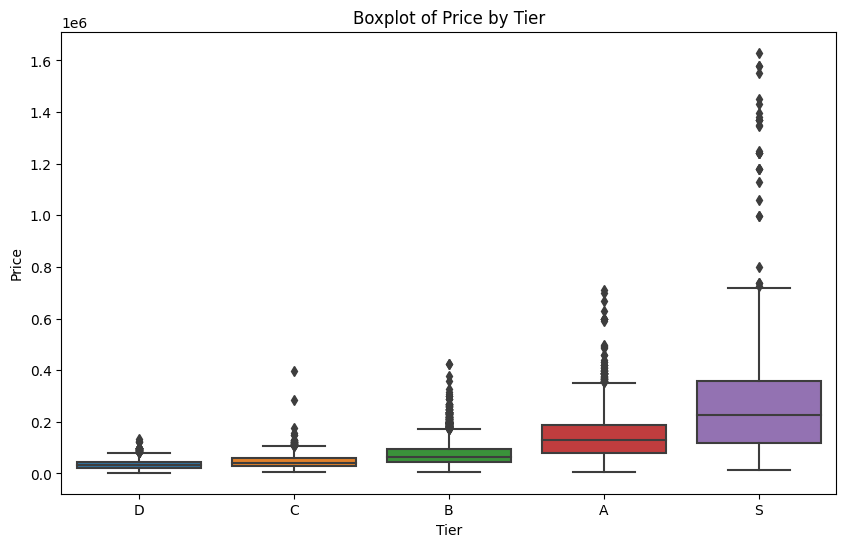

In [ ]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='brand_tier', y='price', data=df)
plt.title('Boxplot of Price by Tier')
plt.xlabel('Tier')
plt.ylabel('Price')
plt.show()

In [ ]:
df['brand_tier'] = df['brand_tier'].astype('object')

In [ ]:
df_backup = df.copy()

## Correlation and Relationship

In [ ]:
analyze_column_types(df)

Discrete columns: link, brand, line, monthly_payment, Transmission, Doors, Assembled, Engine Type, Direct Injection, Aspiration, Fuel Type, Front Brakes, Rear Brakes, Front Suspension, Rear Suspension, Steering Type, Front Tyre, Rear Tyre, Front Rim (inches), Rear Rim (inches), brand_tier
Count: 21

Continuous columns: price, mileage, Number of Gears, Seat Capacity, Engine CC, Peak Torque (Nm), Wheel Base (mm), Front Thread, Fuel Tank (litres), vehicle_age, volume, specific_power
Count: 12



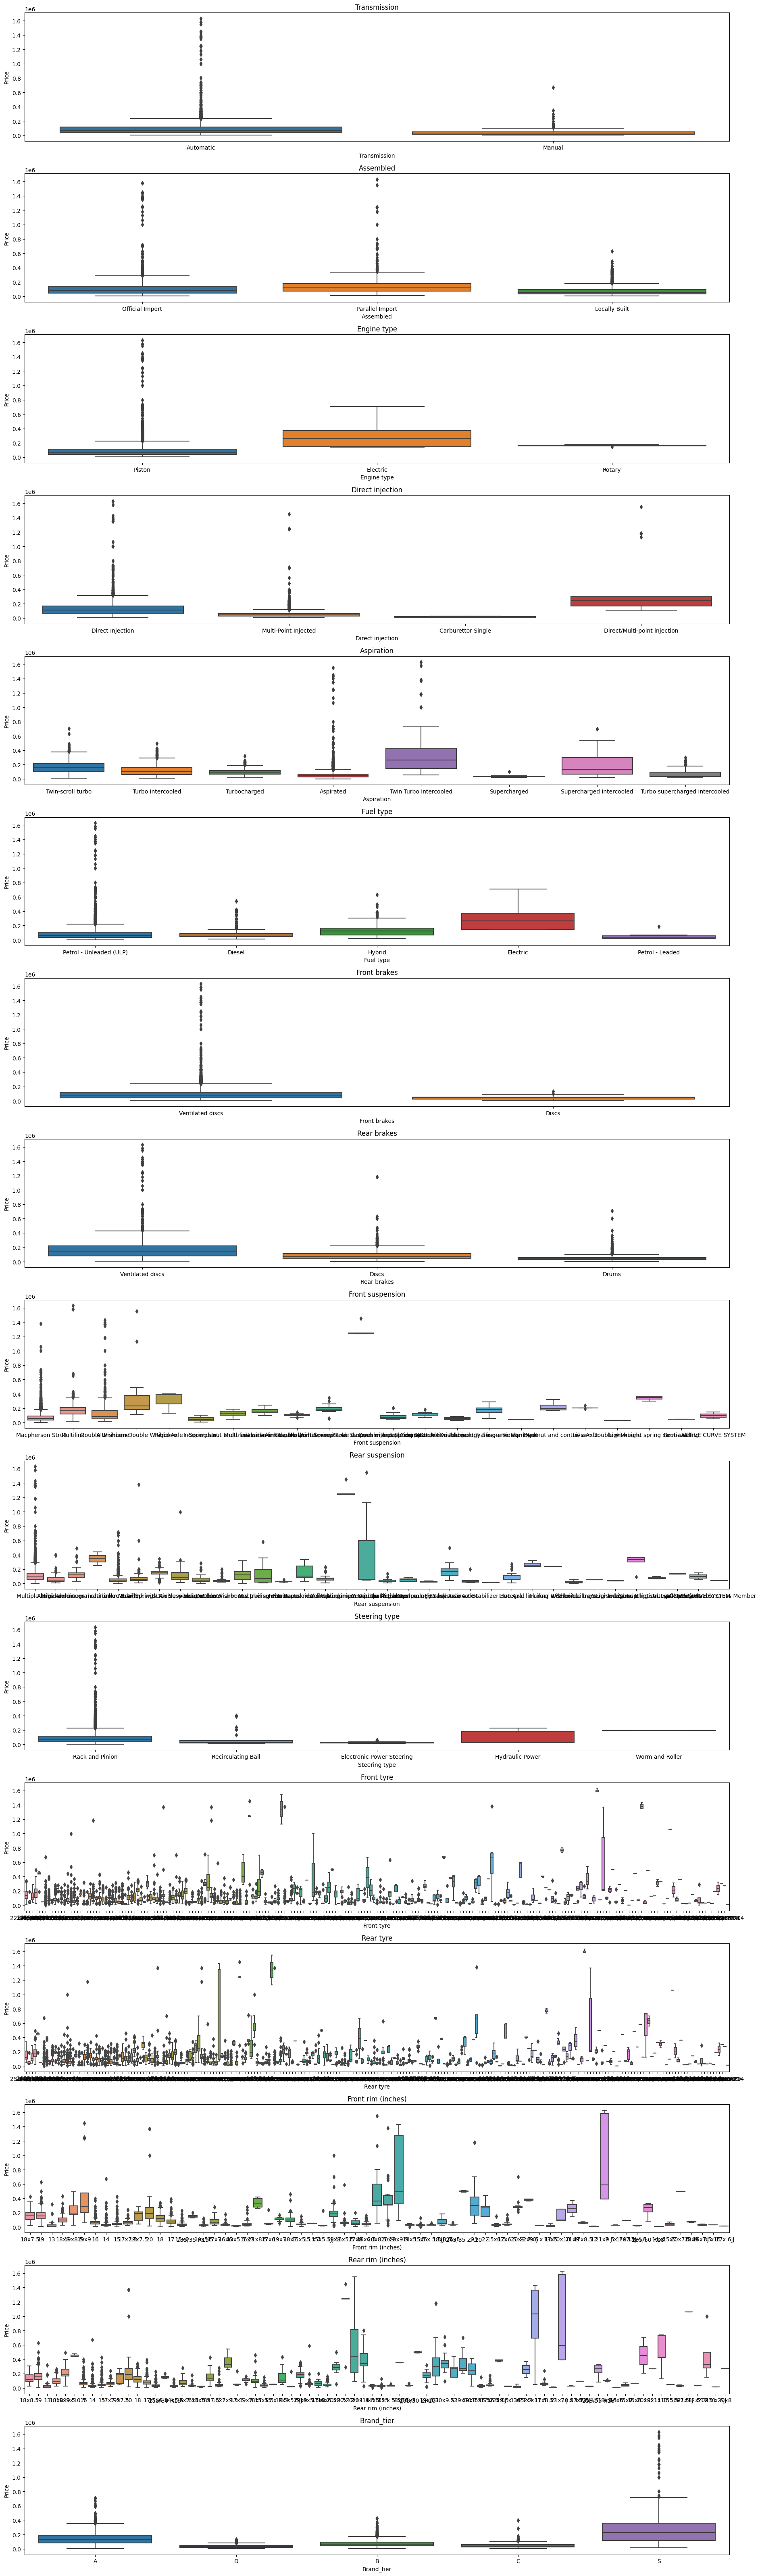

In [ ]:
cat_features = ['Transmission',
                'Assembled',
                'Engine Type',
                'Direct Injection',
                'Aspiration',
                'Fuel Type',
                'Front Brakes',
                'Rear Brakes',
                'Front Suspension',
                'Rear Suspension',
                'Steering Type',
                'Front Tyre',
                'Rear Tyre',
                'Front Rim (inches)',
                'Rear Rim (inches)',
                'brand_tier']

fig, axs = plt.subplots(len(cat_features), figsize=(19, 4*len(cat_features)))

for i, column in enumerate(cat_features):
    sns.boxplot(x=df[column], y=df['price'], ax=axs[i])
    axs[i].set_title(column.capitalize())
    axs[i].set_xlabel(column.capitalize())
    axs[i].set_ylabel('Price')

plt.tight_layout()
plt.show()

<Axes: title={'center': 'Pearson Correlation Matrix (Continuos Features)'}>

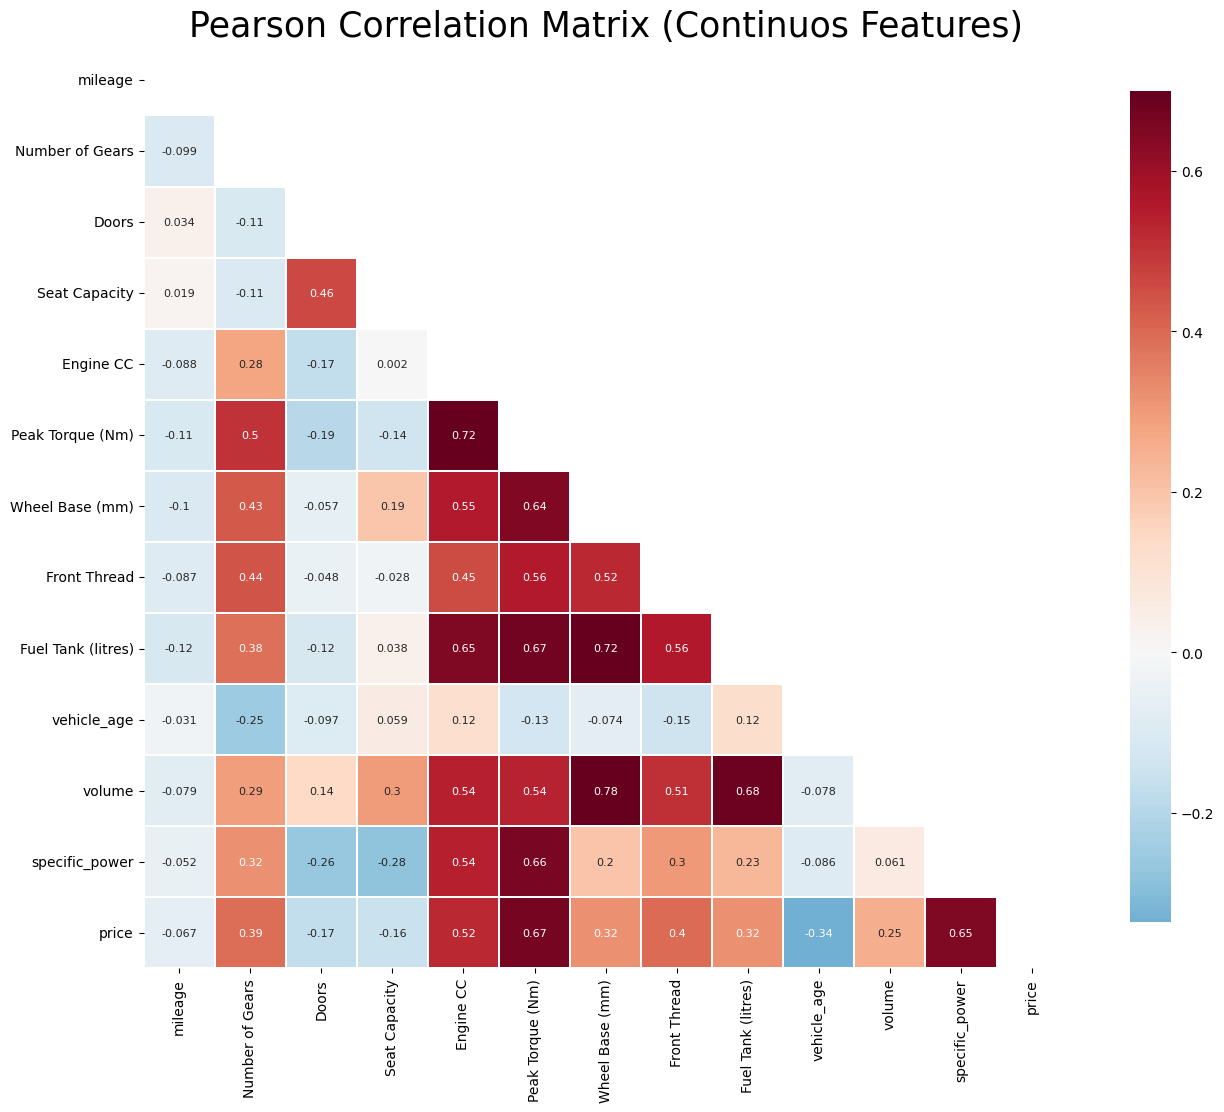

In [ ]:
cont_features = ['mileage',
                  'Number of Gears',
                  'Doors',
                  'Seat Capacity',
                  'Engine CC',
                  'Peak Torque (Nm)',
                  'Wheel Base (mm)',
                  'Front Thread',
                  'Fuel Tank (litres)',
                  'vehicle_age',
                  'volume',
                  'specific_power',
                  'price']

mask = np.zeros_like(df[cont_features].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix (Continuos Features)',fontsize=25)

sns.heatmap(df[cont_features].corr(), linewidths=0.25, vmax=0.7, center=0, square=True, cmap="RdBu_r",
            linecolor='w', annot=True, annot_kws={"size": 8}, mask=mask, cbar_kws={"shrink": .9})

In [ ]:
cat_features = ['brand',
                'Transmission',
                'Assembled',
                'Engine Type',
                'Direct Injection',
                'Aspiration',
                'Fuel Type',
                'Front Brakes',
                'Rear Brakes',
                'Front Suspension',
                'Rear Suspension',
                'Steering Type',
                'Front Tyre',
                'Rear Tyre',
                'Front Rim (inches)',
                'Rear Rim (inches)',
                'brand_tier']

from scipy.stats import f_oneway

# Create an empty DataFrame to store the results
anova_results = pd.DataFrame(columns=['Categorical Feature', 'F-Statistic', 'P-Value'])

# Perform one-way ANOVA for each categorical feature and store the results in the DataFrame
for feature in cat_features:
    groups = [group for name, group in df.groupby(feature)['price']]
    f_statistic, p_value = f_oneway(*groups)

    # Append the results to the DataFrame
    anova_results = anova_results.append({'Categorical Feature': feature, 'F-Statistic': f_statistic, 'P-Value': p_value}, ignore_index=True)

# Print the results DataFrame
print("ANOVA: Analysis of Variance")
anova_results.sort_values(by='F-Statistic', ascending=False)

ANOVA: Analysis of Variance


,Categorical Feature,F-Statistic,P-Value
16,brand_tier,982.343967,0.000000e+00
8,Rear Brakes,935.133884,0.000000e+00
4,Direct Injection,523.429824,1.110365e-309
5,Aspiration,359.035718,0.000000e+00
2,Assembled,261.932660,8.587988e-111
0,brand,254.851353,0.000000e+00
7,Front Brakes,144.916163,4.422649e-33
15,Rear Rim (inches),139.876423,0.000000e+00
14,Front Rim (inches),126.715214,0.000000e+00
9,Front Suspension,97.851160,0.000000e+00


## Drop Columns

**Drop irrelevant columns**

In [ ]:
columns_drop = ['link', 'line', 'monthly_payment']
df.drop(columns=columns_drop, inplace=True)

**Drop least correlated features**

In [ ]:
columns_drop = ['Steering Type',
                'Fuel Type',
                'Rear Tyre',
                'Engine Type',
                'Front Tyre',
                'Rear Suspension',
                'Transmission',
                'Front Suspension',
                'Front Rim (inches)',
                'Front Brakes',
                'Rear Rim (inches)',
                'mileage',
                'Doors',
                'Seat Capacity',
                'brand',
                'Peak Torque (Nm)']

df.drop(columns=columns_drop, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7731 entries, 0 to 7996
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               7731 non-null   float64
 1   Number of Gears     7731 non-null   int64  
 2   Assembled           7731 non-null   object 
 3   Engine CC           7731 non-null   int64  
 4   Direct Injection    7731 non-null   object 
 5   Aspiration          7731 non-null   object 
 6   Wheel Base (mm)     7731 non-null   float64
 7   Front Thread        7731 non-null   float64
 8   Fuel Tank (litres)  7731 non-null   float64
 9   Rear Brakes         7731 non-null   object 
 10  vehicle_age         7731 non-null   int64  
 11  volume              7731 non-null   float64
 12  specific_power      7731 non-null   float64
 13  brand_tier          7731 non-null   object 
dtypes: float64(6), int64(3), object(5)
memory usage: 906.0+ KB


In [ ]:
df_backup = df.copy()

In [ ]:
df.to_csv('cleaned_data.csv')

## Features Transformation

In [ ]:
cat_features = ['Assembled',
                'Direct Injection',
                'Aspiration',
                'Rear Brakes',
                'brand_tier']

num_features = ['Number of Gears',
                'Engine CC',
                'Wheel Base (mm)',
                'Front Thread',
                'Fuel Tank (litres)',
                'vehicle_age',
                'volume',
                'specific_power']

response = 'price'

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

transformer = ColumnTransformer(transformers=[('cat', OneHotEncoder(), cat_features),
                                              ('num', MinMaxScaler(), num_features)], remainder="passthrough")

# Model Development

In [ ]:
models_table = pd.DataFrame(columns=["Model", "Model Alias", "Detail","R2 Score (Train)", "Adjusted R2 Score (Train)", "RMSE (Test)", "R2 Score (Test)", "Adjusted R2 Score (Test)",
                                     "Cross-Validated RMSE","Cross-Validated R2 Score"])
models_table = pd.DataFrame(columns=models_table.columns)
models_table.head()

,Model,Model Alias,Detail,R2 Score (Train),Adjusted R2 Score (Train),RMSE (Test),R2 Score (Test),Adjusted R2 Score (Test),Cross-Validated RMSE,Cross-Validated R2 Score


In [ ]:
from sklearn.model_selection import train_test_split

x_data = df.drop("price", axis=1)
y_data = df["price"]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (6957, 13) (6957,)
Test set: (774, 13) (774,)


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

def cross_fold(pipeline):
    Rcross = cross_val_score(pipeline, x_data, y_data, cv=10).mean()
    RMSEcross = np.sqrt(-cross_val_score(model,x_data, y_data, scoring="neg_mean_squared_error", cv=10)).mean()
    return Rcross, RMSEcross

def evaluation_train(y, predictions):
    r2_train = r2_score(y, predictions)
    return r2_train

def evaluation_test(y, predictions):
    rmse_test = np.sqrt(mean_squared_error(y, predictions))
    r2_test = r2_score(y, predictions)
    return rmse_test, r2_test

def R2_train_adjusted(r_squared,n,k):
    adjusted_r2 = r2_train-(k-1)/(n-k)*(1-r2_train)
    return adjusted_r2

def R2_test_adjusted(r_squared,n,k):
    adjusted_r2_train = r2_test-(k-1)/(n-k)*(1-r2_test)
    return adjusted_r2_train

In [ ]:
# Clear all table
models_table.drop(models_table.index, inplace=True)

## Baseline Model (Multiple Linear Regressor)

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression

# Train the Model
mlr1 = LinearRegression()

pipe = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', mlr1)
])

pipe.fit(x_train,  y_train)

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['Assembled',
                                                   'Direct Injection',
                                                   'Aspiration', 'Rear Brakes',
                                                   'brand_tier']),
                                                 ('num', MinMaxScaler(),
                                                  ['Number of Gears',
                                                   'Engine CC',
                                                   'Wheel Base (mm)',
                                                   'Front Thread',
                                                   'Fuel Tank (litres)',
                                                   'vehicle_age', 'volume',
                                                   'specific_power'])])),
                ('Model', LinearRegression())])

In [ ]:
n = x_data.shape[0]
k = len(x_data.columns)

# Model Prediction
predictions_train = pipe.predict(x_train)
predictions_test = pipe.predict(x_test)

# Validate Model Performance
r2_train = evaluation_train(y_train, predictions_train)
rmse_test, r2_test = evaluation_test(y_test, predictions_test)
adjusted_r2_train = R2_train_adjusted(r2_train,n,k)
adjusted_r2_test = R2_test_adjusted(r2_test,n,k)

print("-"*30)
print("MULTIPLE LINEAR REGRESSION") # Changeable
print("-"*30)
print("R2 Score (Train):", r2_train)
print("Adjusted R2 Score (Train):", adjusted_r2_train)
print("RMSE (Test):", rmse_test)
print("R2 Score (Test):", r2_test)
print("Adjusted R2 Score (Test):", adjusted_r2_test)
print("-"*30)

Rcross = cross_val_score(pipe, x_data, y_data, cv=10).mean()
RMSEcross = np.sqrt(-cross_val_score(pipe,x_data, y_data, scoring="neg_mean_squared_error", cv=10)).mean()
print("RMSE Cross-Validation:", RMSEcross)
print("R2 Score Cross-Validation:", Rcross)

new_row = {"Model": "Multiple Linear Regression", # Changeable
           "Model Alias": "mlr1", # Changeable
           "Detail": "Default, Pre-Process", # Changeable
           "R2 Score (Train)": r2_train ,
           "Adjusted R2 Score (Train)": adjusted_r2_train,
           "RMSE (Test)": rmse_test,
           "R2 Score (Test)": r2_test,
           "Adjusted R2 Score (Test)": adjusted_r2_test,
           "Cross-Validated RMSE": RMSEcross,
           "Cross-Validated R2 Score": Rcross }

models_table = models_table.append(new_row, ignore_index=True)
models_table

------------------------------
MULTIPLE LINEAR REGRESSION
------------------------------
R2 Score (Train): 0.6405792711053513
Adjusted R2 Score (Train): 0.6400204412599593
RMSE (Test): 62423.108374332776
R2 Score (Test): 0.6626362052489367
Adjusted R2 Score (Test): 0.6621116696779322
------------------------------
RMSE Cross-Validation: 64325.87011967568
R2 Score Cross-Validation: 0.6124476499410683


,Model,Model Alias,Detail,R2 Score (Train),Adjusted R2 Score (Train),RMSE (Test),R2 Score (Test),Adjusted R2 Score (Test),Cross-Validated RMSE,Cross-Validated R2 Score
0,Multiple Linear Regression,mlr1,"Default, Pre-Process",0.640579,0.64002,62423.108374,0.662636,0.662112,64325.87012,0.612448


## Random Forest Regressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
max_features = ['auto', 'log2'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

param_grid = {'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf2 = RandomizedSearchCV(estimator=RandomForestRegressor(),
                         param_distributions=param_grid,
                         scoring='neg_mean_squared_error',
                         cv=10,
                         n_iter=60,
                         n_jobs=-1,
                         verbose=2,
                         random_state=1)

pipe2 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', rf2)
])

pipe2.fit(x_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['Assembled',
                                                   'Direct Injection',
                                                   'Aspiration', 'Rear Brakes',
                                                   'brand_tier']),
                                                 ('num', MinMaxScaler(),
                                                  ['Number of Gears',
                                                   'Engine CC',
                                                   'Wheel Base (mm)',
                                                   'Front Thread',
                                                   'Fuel Tank (litres)',
                                                   'vehicle_age', 'volume',
                                                   'specific_power'])])),
                ('Model',
                 RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                                    n_iter=60, n_jobs=-1,
                                    param_distributions={'bootstrap': [True,
                                                                       False],
                                                         'max_depth': [10, 20,
                                                                       30, 40,
                                                                       50, 60,
                                                                       70, 80,
                                                                       90, 100,
                                                                       110,
                                                                       120],
                                                         'max_features': ['auto',
                                                                          'log2'],
                                                         'min_samples_leaf': [1,
                                                                              3,
                                                                              4],
                                                         'min_samples_split': [2,
                                                                               6,
                                                                               10]},
                                    random_state=1,
                                    scoring='neg_mean_squared_error',
                                    verbose=2))])

In [ ]:
# Access the best parameters from the best_estimator_ attribute
best_params = pipe2.named_steps['Model'].best_estimator_.get_params()

print('Random grid: ', param_grid, '\n')
# Print the best parameters
print('Best Parameters: ', best_params, ' \n')

Random grid:  {'max_features': ['auto', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 50, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 6, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}  



In [ ]:
# Train the Model
rf2 = RandomForestRegressor(bootstrap=False,
                           max_depth=50,
                           max_features='log2',
                           min_samples_leaf=1,
                           min_samples_split=6)

pipe2 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', rf2)
])

pipe2.fit(x_train,  y_train)

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['Assembled',
                                                   'Direct Injection',
                                                   'Aspiration', 'Rear Brakes',
                                                   'brand_tier']),
                                                 ('num', MinMaxScaler(),
                                                  ['Number of Gears',
                                                   'Engine CC',
                                                   'Wheel Base (mm)',
                                                   'Front Thread',
                                                   'Fuel Tank (litres)',
                                                   'vehicle_age', 'volume',
                                                   'specific_power'])])),
                ('Model',
                 RandomForestRegressor(bootstrap=False, max_depth=50,
                                       max_features='log2',
                                       min_samples_split=6))])

In [ ]:
n = x_data.shape[0]
k = len(x_data.columns)

# Model Prediction
predictions_train = pipe2.predict(x_train)
predictions_test = pipe2.predict(x_test)

# Validate Model Performance
r2_train = evaluation_train(y_train, predictions_train)
rmse_test, r2_test = evaluation_test(y_test, predictions_test)
adjusted_r2_train = R2_train_adjusted(r2_train,n,k)
adjusted_r2_test = R2_test_adjusted(r2_test,n,k)

print("-"*30)
print("RANDOM FOREST REGRESSOR") # Changeable
print("-"*30)
print("R2 Score (Train):", r2_train)
print("Adjusted R2 Score (Train):", adjusted_r2_train)
print("RMSE (Test):", rmse_test)
print("R2 Score (Test):", r2_test)
print("Adjusted R2 Score (Test):", adjusted_r2_test)
print("-"*30)

Rcross = cross_val_score(pipe2, x_data, y_data, cv=10).mean()
RMSEcross = np.sqrt(-cross_val_score(pipe2,x_data, y_data, scoring="neg_mean_squared_error", cv=10)).mean()
print("RMSE Cross-Validation:", RMSEcross)
print("R2 Score Cross-Validation:", Rcross)

new_row = {"Model": "Random Forest Regressor", # Changeable
           "Model Alias": "rf3", # Changeable
           "Detail": "bootstrap=False,max_depth=50,max_features='log2',min_samples_leaf=1,min_samples_split=6", # Changeable
           "R2 Score (Train)": r2_train ,
           "Adjusted R2 Score (Train)": adjusted_r2_train,
           "RMSE (Test)": rmse_test,
           "R2 Score (Test)": r2_test,
           "Adjusted R2 Score (Test)": adjusted_r2_test,
           "Cross-Validated RMSE": RMSEcross,
           "Cross-Validated R2 Score": Rcross }

models_table = models_table.append(new_row, ignore_index=True)
models_table

------------------------------
RANDOM FOREST REGRESSOR
------------------------------
R2 Score (Train): 0.9903945619841117
Adjusted R2 Score (Train): 0.9903796273823767
RMSE (Test): 22303.464478138514
R2 Score (Test): 0.9569322335375448
Adjusted R2 Score (Test): 0.9568652714751518
------------------------------
RMSE Cross-Validation: 27458.34936764453
R2 Score Cross-Validation: 0.9270900501726814


,Model,Model Alias,Detail,R2 Score (Train),Adjusted R2 Score (Train),RMSE (Test),R2 Score (Test),Adjusted R2 Score (Test),Cross-Validated RMSE,Cross-Validated R2 Score
0,Multiple Linear Regression,mlr1,"Default, Pre-Process",0.640579,0.640020,62423.108374,0.662636,0.662112,64325.870120,0.612448
1,Random Forest Regressor,rf2,"bootstrap=False,max_depth=70,max_features='log...",0.990370,0.990355,22677.920265,0.955474,0.955405,27548.464288,0.927004
2,Random Forest Regressor,rf3,"bootstrap=False,max_depth=50,max_features='log...",0.990395,0.990380,22303.464478,0.956932,0.956865,27458.349368,0.927090


# Model Evalutation

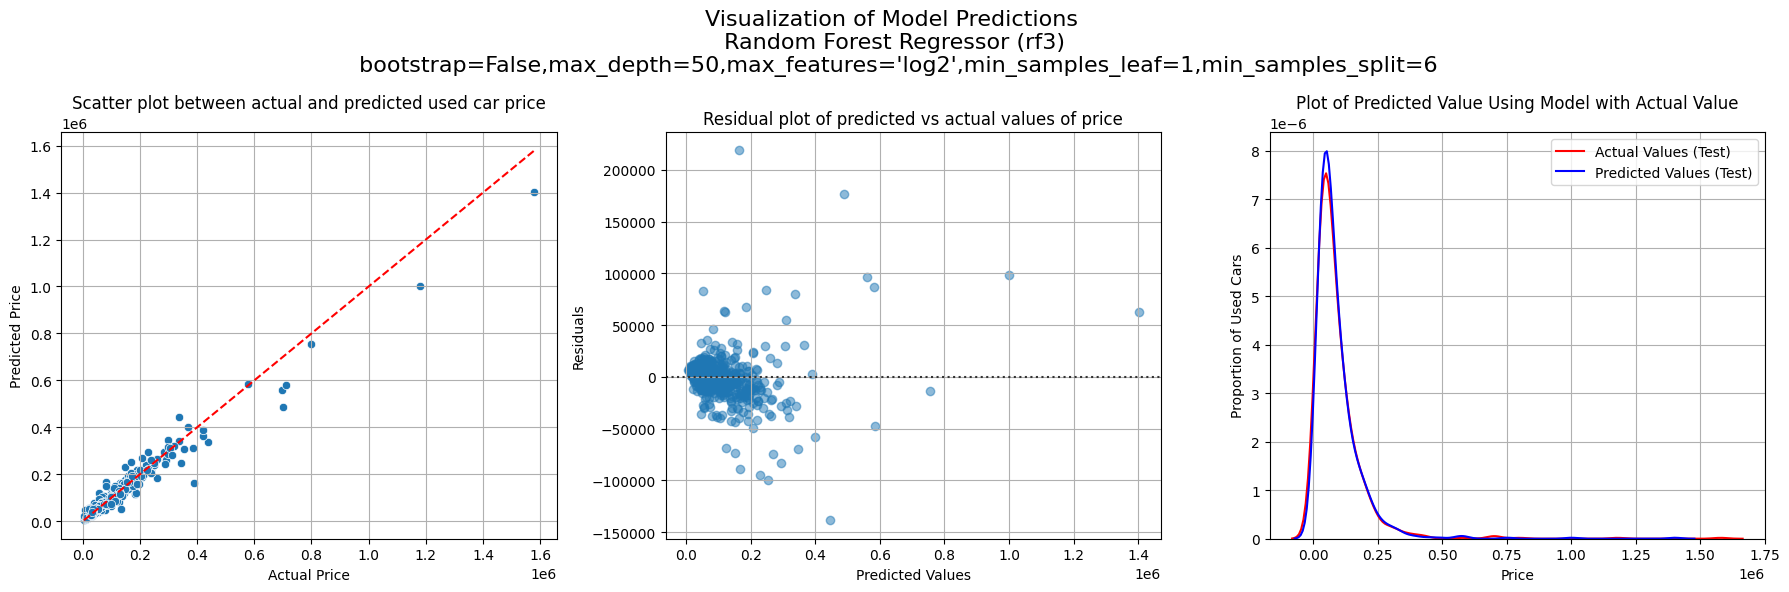

In [ ]:
# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot the scatter plot between actual and predicted car price
predictions = pipe2.predict(x_test)
sns.scatterplot(x=y_test, y=predictions, ax=axes[0])
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')
axes[0].set_title('Scatter plot between actual and predicted used car price')
axes[0].grid()
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Calculate residuals
residuals = y_test - predictions

# Plot the residual plot
sns.residplot(x=predictions, y=residuals, lowess=False, ax=axes[1], scatter_kws={'alpha': 0.5})
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].grid()
axes[1].set_title('Residual plot of predicted vs actual values of price')

# Plot the distribution plot
Title = 'Plot of Predicted Value Using Model with Actual Value'
sns.distplot(y_test, hist=False, color="r", label="Actual Values (Test)", ax=axes[2])
sns.distplot(predictions, hist=False, color="b", label="Predicted Values (Test)", ax=axes[2])
axes[2].set_title(Title)
axes[2].set_xlabel('Price')
axes[2].set_ylabel('Proportion of Used Cars')
axes[2].grid()
axes[2].legend()

# Add super title
fig.suptitle('Visualization of Model Predictions \n Random Forest Regressor (rf3) \n bootstrap=False,max_depth=50,max_features=\'log2\',min_samples_leaf=1,min_samples_split=6', fontsize=16)

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

# Save Model

Using 'pickle' to save the best trained model.

In [ ]:
import pickle


In [ ]:
# Save the pipeline and model to a file
with open('rf3_pipeline.pkl', 'wb') as file:
    pickle.dump(pipe2, file)

from google.colab import files

# Provide the filename of the saved model
files.download('rf3_pipeline.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Load the saved pipeline and model
with open('rf3_pipeline.pkl', 'rb') as file:
    loaded_pipeline = pickle.load(file)

# Make predictions
predictions_train = loaded_pipeline.predict(x_train)
predictions_test = loaded_pipeline.predict(x_test)


In [ ]:
# Validate Model Performance
r2_train = evaluation_train(y_train, predictions_train)
rmse_test, r2_test = evaluation_test(y_test, predictions_test)
adjusted_r2_train = R2_train_adjusted(r2_train,n,k)
adjusted_r2_test = R2_test_adjusted(r2_test,n,k)

print("-"*30)
print("RANDOM FOREST REGRESSOR") # Changeable
print("-"*30)
print("R2 Score (Train):", r2_train)
print("Adjusted R2 Score (Train):", adjusted_r2_train)
print("RMSE (Test):", rmse_test)
print("R2 Score (Test):", r2_test)
print("Adjusted R2 Score (Test):", adjusted_r2_test)
print("-"*30)

------------------------------
RANDOM FOREST REGRESSOR
------------------------------
R2 Score (Train): 0.9903945619841117
Adjusted R2 Score (Train): 0.9903796273823767
RMSE (Test): 22303.464478138514
R2 Score (Test): 0.9569322335375448
Adjusted R2 Score (Test): 0.9568652714751518
------------------------------
